In [26]:
import warnings
warnings.filterwarnings('ignore')
from pos import *

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set("talk",font_scale=3)

In [28]:
def get_results(nu,g,s0):
    try:
        if g == 0:
            folder ="new_nu_"+str(nu)
            porcentaje_crimen=np.array([0.34,0.33,0.33])
        else:
            folder ="n_0"+str(int(nu*10))
            porcentaje_crimen=np.array([0.5,0.3,0.2])

        solucion=np.load(folder+"/solucion_sg__g_m_v.npy")
        n=100
        crimen=3
        tipo="sg"
        modelo="g_m_v"
        dist_crimn=dist_crimen(crimen=crimen,n=n,porcentaje=porcentaje_crimen)
        vecinos=convert_state_to_vecinos(state=solucion,dist_crimen=dist_crimn,n=n)
        G=convert_vertices_to_graph(vecinos)
        M=plot(modelo=modelo,s=s0,nu=nu,vertices=vecinos,legends={"A":"Immune","B":"Susceptible","C":"Highly Susceptible"})
        A=assor(G)
        matrix=mixing_matrix(G)
        
    except:
        M=0
        A=0
        matrix=np.zeros((3,3))

    return "{0:.2f}".format(M), "{0:.2f}".format(A), matrix   
    

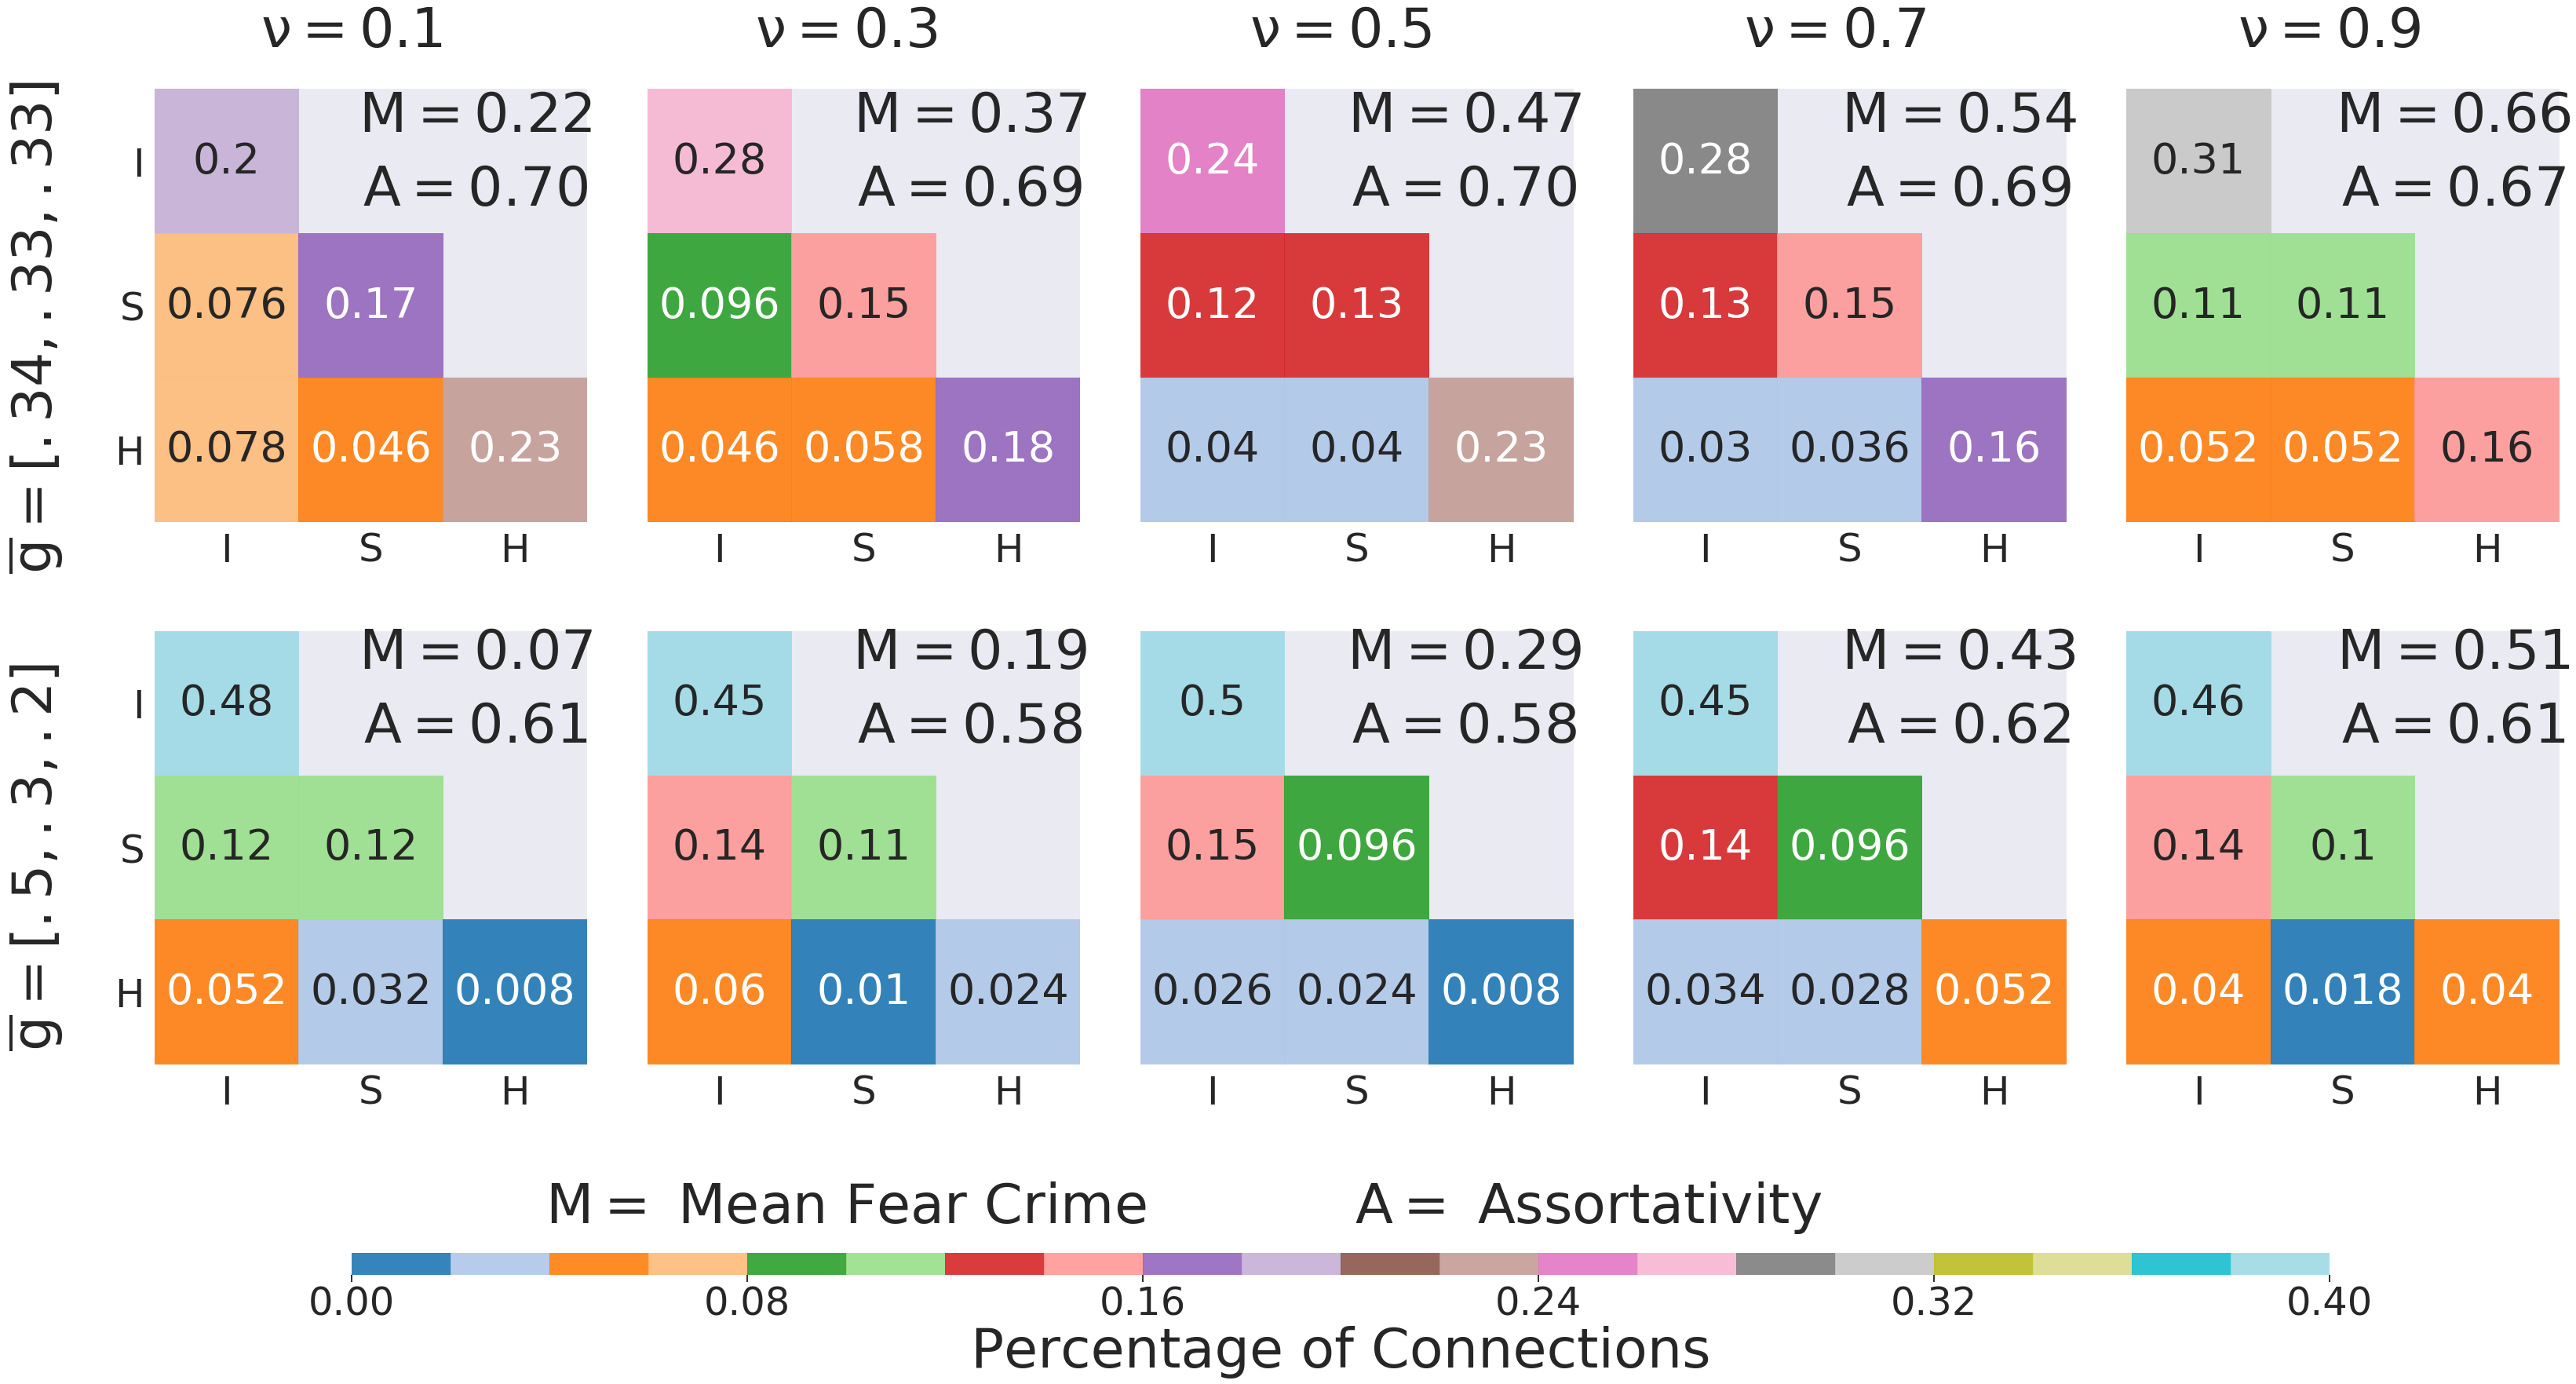

In [29]:

fig, axes = plt.subplots(2,5,figsize=(50,20),sharey=True)
cbar_ax = fig.add_axes([0.1, -0.1, 0.7, 0.02])
cbar_ax.xaxis.label.set_size(70)

nu=[0.1,0.3,0.5,0.7,0.9]
for idx, val in enumerate(nu):
    plt.text(0+idx*0.10, 22, r'$\nu='+str(val)+'$', fontsize = 70, horizontalalignment='center', verticalalignment='center')    

plt.text(-0.07, 10, r'$\overline{g}=[.5,.3,.2]$', fontsize = 70,rotation=90)
plt.text(-0.07, 20.3, r'$\overline{g}=[.34,.33,.33]$', fontsize = 70,rotation=90)

plt.text(0.1, 1.2, r'$M=$ Mean Fear Crime', fontsize = 70, horizontalalignment='center', verticalalignment='center')    
plt.text(0.25, 1.2, r'$A=$ Assortativity', fontsize = 70, horizontalalignment='center', verticalalignment='center')    

    
s0=np.random.rand(100)

mask = np.zeros((3,3))
mask[(np.array([0, 0, 1]), np.array([ 1, 2, 2]))] = True

labels=["I","S","H"]

with sns.axes_style("white"):
    for i, ax in enumerate(axes.flat):
        
        if i <= 4: 
            p0=20.5   
            g=0
        else:
            p0=11
            g=1
        
        M,A,matrix=get_results(nu[i%5],g,s0)
        #M=round(3*np.random.rand())
        #A=round(3*np.random.rand())
        #matrix=np.random.rand(3,3)
        plt.text(0.025+(i%5)*0.10, p0, r'$M='+str(M)+'$', fontsize = 70,horizontalalignment='center', verticalalignment='center')
        plt.text(0.025+(i%5)*0.10, p0-1.3, r'$A='+str(A)+'$', fontsize = 70,horizontalalignment='center', verticalalignment='center')
        
        
        
        g=sns.heatmap(matrix, ax=ax,
                    cbar=i == 0,
                    vmin=0, vmax=0.4,
                    square=True,
                    mask=mask,
                    cmap="tab20",
                    annot=True,
                    xticklabels=labels,
                    yticklabels=labels,
                    alpha=0.9,
                    cbar_kws={'label': 'Percentage of Connections',"orientation": "horizontal"},
                    cbar_ax=None if i else cbar_ax)
        g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 50)
        g.set_yticklabels(g.get_xticklabels(), rotation = 0, fontsize = 50)
fig.tight_layout(rect=[0, 0, .9, 1])
#plt.savefig("summarize_1.pdf",bbox_inches='tight')
fig.show()



In [30]:
mean_crime=np.zeros(10)
assorta=np.zeros(10)
ii_=np.zeros(10)
is_=np.zeros(10)
ih_=np.zeros(10)
ss_=np.zeros(10)
sh_=np.zeros(10)
hh_=np.zeros(10)

In [31]:
for i in range(10):        
        if i <= 4:    
            g=1
        else:
            g=0
        
        M,A,matrix=get_results(nu[i%5],g,s0)
        mean_crime[i]=float(M)
        assorta[i]=float(A)
        ii_[i]=matrix[0][0]
        is_[i]=matrix[0][1]
        ih_[i]=matrix[0][2]
        ss_[i]=matrix[1][1]
        sh_[i]=matrix[1][2]
        hh_[i]=matrix[2][2]

In [32]:
import pandas as pd

In [106]:
data={'g':5*[r'$\overline{g}=[.50,.30,.20]$']+5*[r'$\overline{g}=[.34,.33,.33]$'],
      'v':[0.1,0.3,0.5,0.7,0.9,0.1,0.3,0.5,0.7,0.9],
      'Mean of Crime':mean_crime,
      'Assortativity':assorta,
      'II':ii_,
      'IS':is_,
      'IH':ih_,
      'SS':ss_,
      'SH':sh_,
      'HH':hh_}

In [107]:
dg=pd.DataFrame(data)

In [108]:
import seaborn as sns
sns.set(style="whitegrid")


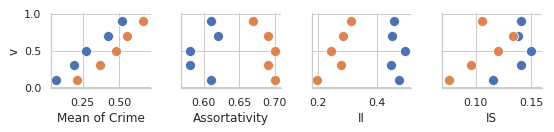

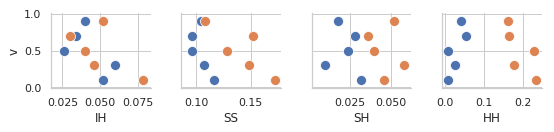

In [145]:
g=sns.PairGrid(dg,x_vars=["Mean of Crime","Assortativity","II","IS"],y_vars=['v'],hue="g",height=2)
g.map(sns.scatterplot,s=100)
# plt.legend([r'$\nu=0.1$',r'$\nu=0.3$',r'$\nu=0.5$',r'$\nu=0.7$',r'$\nu=0.9$'],ncol=5,bbox_to_anchor=(-4.5, 1.5))
# sns.despine(fig=g.fig, left=True)

h=sns.PairGrid(dg,x_vars=["IH","SS","SH","HH"],y_vars=['v'],hue="g",height=2)
h.map(sns.scatterplot,s=100)
# plt.legend([r'$\nu=0.1$',r'$\nu=0.3$',r'$\nu=0.5$',r'$\nu=0.7$',r'$\nu=0.9$'],ncol=5,bbox_to_anchor=(-4.5, 1.5))
# sns.despine(fig=g.fig, left=True)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAioAAACECAYAAAC+uQAEAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzt3X1UVHX+B/D3zDA8qChIgICmZutDKTmIhhK/FBBRBzHSNB9WIx/QTq65mWz5kG66aR3bhbU6tqW5upmmUgi5ibJq2LrKmkhiPmSJ8qCCKMoAw8z394eHWSeZ4cLcufO9l8/rHM+R4TL3c7+fz3f4cufO/agYYwyEEEIIIRxSuzoAQgghhBBbaKFCCCGEEG7RQoUQQggh3KKFCiGEEEK4RQsVQgghhHCLFiqEEEII4RYtVAghhBDCLVqoEEIIIYRbtFAhhBBCCLckWaisXbsW0dHR6NOnD86dO9fkNiaTCStXrkRsbCxGjhyJnTt3ShEaIYQQQjgmyUIlJiYG27ZtQ0hIiM1tMjMzcfnyZXzzzTf4/PPPkZ6ejitXrkgRHiGEEEI4JclCJTw8HEFBQXa3yc7OxsSJE6FWq9G5c2fExsZi3759gvfBGENdXR2odVHbRnVAGlEtEIDqQAm4uUaltLQUwcHBlq+DgoJQVlYm+Ofr6+tRWFiI+vp6Z4QnyA8//OCyfTeFt3ik4Ow64GlMeYoF4C8ee7XAW6zO1JaOtSk8/G5opORcOPPY3Jz2zC5SWFjo0v3n5+e7dP+/5sp4Bg0a5LJ9O7MOeMoxT7EATcfjyjoAbNcCb2PnTDwcK691IDUecuEsQo+tpbXAzUIlKCgIJSUlCA0NBfDgGRah+vfvDw8PD7HDEyQ/P9/lk/F+vMUjJWfVAU9jylMsAH/xNGqqFniN1Rna0rHa48rfDY2UnAtnHhs3C5X4+Hjs3LkTcXFxqKqqQk5ODrZt2+bqsGRNrVajrt6Eu7VGNJjMcNOo0d5TCw93jUPPazbWwVx7F8xsgkqtgdqzPdRa174AuJIzxtgZKG98kFMe5FLbcsVzLfCUe0kWKm+99Ra++eYb3LhxAy+88AJ8fHyQlZWF2bNnY8GCBRgwYAASExNx6tQpxMXFAQBeeukldOvWTYrwFKtL1174JLMQB04Uo67eBA93DWLCu+G52N7w6+TVqudsqK7EzbxduFOQC2asg0rrgQ6hI+Ab+SzcvDuLfAT8q7hlwI6cc6KOsTNQ3vggpzzIpbbliuda4C33kixUli5diqVLlz7w+EcffWT5v0ajwcqVK6UIp02ouGXAGx/+G9erDJbH6upNyD76M46fKcc7C6JaXHAN1ZW4uvkPMN2+YXmMGetQnb8PNedPIGTGGrh19BPtGHhXccuAxWlHRB1jZ6C88UFOeZBLbcsVz7XAY+65+dQPEU9dvQk7cs5ZFdr9rlcZsPPAedQbTYKf02ysw828XVYT636m2zdQdXQPzEbXX1kvBWeMsTNQ3vggpzzIpbbliuda4DX3tFBRoLu1Rhw4UWx3m5zjl3Gnxij4Oc21d3GnINfuNtUFB2GuvSP4OeXMGWPsDJQ3PsgpD3KpbbniuRZ4zT0tVBSowWRGXb39FW9dvQkNZrPg52RmE5ixzv42xjowc9v4K8sZY+wMlDc+yCkPcqltueK5FnjNPS1UFMhNo2726mwPdw3c1MLTr1JroGrmanSV1gMqddv4RIAzxtgZKG98kFMe5FLbcsVzLfCae6o0BWrvqUVMuP1PTMUOfhgd2mkFP6fasz06hI6wu413aDTUnh0EP6ecOWOMnYHyxgc55UEutS1XPNcCr7mnhYoCebhr8Fxsb/j7NH1ltr+PFybG/AbuWuErdrXWA76Rz0LT8aEmv6/p+BB8IpOg1rq3Kma5ccYYOwPljQ9yyoNcaluueK4FXnOvefPNN9+UdI9OYjKZcO3aNQQEBMDNzTX3sWvt3XSdoZ2nFkMeewhmpsLl8mqYTAwe7hrER/TAwud1rfp4mdrDCx36DQMzNaD+RjFgNkGl9UBHXRwCxr3s8s/+A86vg/tz3M5Ti6cGBsPYYBZtjFsbiz1S5Y2n+gfs14IrYnXV/GnNsbq6tsXEw++GRo254Pm1tLW5d+ac4ubOtER8ZVd+QnJCKJ6L6Y0GsxluajU6tNM6tBp26+iHzjG/hU9k0n13U+zAxV+CruDXyQvJCY+LOsbOQHnjg5zyIJfaliuea4G33NNCRcHMZjPctRp07iRucam17lBrXX/2hBfOGGNnoLzxQU55kEttyxXPtcBT7ukaFUIIIYRwixYqhBBCCOEWLVQIIYQQwi26RkUmxGy5zXNrcaXhqVW6I6hmhFPCWCmlboltTdWpkblxmXdaqMiAmC23eW4trjS8tUpvLaoZ4ZQwVkqpW2Jb03U6HFrdOPzxsx9xobiKq7zTWz+ca2y5nX30Z0sPhsaW24vTjqDiVtNdLpvS2Fq8On+fpddEY2vxq5v/gIbbFU45hrZIzLy5EtWMcEoYK6XULbHNdp3+E7d2rMCSpF7w8nDjKu+0UOGYmC23eW4trjS8tkpvKaoZ4ZQwVkqpW2KbkDplp7MQFx5keYyHvNNChWNittzmubW40vDaKr2lqGaEU8JYKaVuiW1C6rT2h0OIfcL69v6uzjstVDgmZsttnluLKw2vrdJbimpGOCWMlVLqltgmtE61amb1mKvzTgsVjonZcpvn1uJKw2ur9JaimhFOCWOllLoltgmtU6NZZfWYq/NOFccxMVtu89xaXGl4bZXeUlQzwilhrJRSt8Q2IXXq+fjTyDllfQ2Lq/NOCxWOidlym+fW4krDa6v0lqKaEU4JY6WUuiW2CalTVage35wotTzGQ95pocI5v05eeGdBFMZG9rSclvVw12BsZE+8syCqRZ9vd/PujJAZa9Bx0GjL6T+V1gMdB41GyMw/yeY+D3IgZt5ciWpGOCWMlVLqlthmq069B8Wj06SVWLvrAgx1DVzlnW74JgNittzmubW40vDWKr21qGaEU8JYKaVuiW226rQBGix7wYe7vNNCRSbEbLnNc2txpeGpVbojqGaEU8JYKaVuiW1N1ak7wGXe6a0fQgghhHCLFiqEEEII4RYtVAghhBDCLbpGRURqtdpl7dGbbC1PN2Z6ALWvF19j7fXtFoiG6sp7tdfMTaXkpMm5paDjEwvNLenxUJuNeQ8M6YXK27VOybtkC5VLly4hNTUVVVVV8PHxwdq1a9GjRw+rbdLT0/GPf/wDAQEBAICwsDCsWLFCqhAd1qVrL3ySWSh5e3RbreX7DE5w2j7liNrXi89W7flGPiuLj+M2R+nHJxaaW9LjoTalyrtkC5UVK1ZgypQpSExMxJdffonly5djy5YtD2w3fvx4LFmyRKqwRFNxy4A3Pvy3VefRxjbZx8+UO+2z6I0tu+/vhtnYWr7m/AmEzFgDt45+ou9Xbhrb10udHyVTeu0p/fjEQnNLejzUppR5F/zewOrVq1FQUNCqnVRUVODMmTPQ6/UAAL1ejzNnzqCysrJVz8cbV7VHV0JreSlQ+3rxKb32lH58YqG5JT0ealPqvAteqDDGMH/+fMTFxSEtLQ0//fST4J2UlpYiMDAQGs299600Gg0CAgJQWlr6wLZZWVlISEhAcnIyTp48KXgfruSq9uhKaC0vBWpfLz6l157Sj08sNLekx0NtSp13wW/9LF26FK+//jq+++477N27F5MmTUK3bt2QkJCAF154QZRgJk+ejJSUFGi1WuTl5WH+/PnIzs6Gr6+v4OcoLCwUJZaWCAzpJag9eo2hFpcu/CDafvt2CxTUsrvOYMCpc/mi7VeoQYMGSb7PRvfXgdj5yc+XfixtcVUsLak9N2+JgrLB1muCvbHjfW61lLPqpCVzq3MnT6fEIJQrfjc0xdFc8FCbjr6mtvR3Q4uuUVGr1YiMjERkZCQWLlyIP/zhD1i3bl2zC5WgoCCUl5fDZDJBo9HAZDLh2rVrCAoKstrO39/f8v/IyEgEBQXh/PnzGDJkiOAY+/fvDw8Paa96rrxdCw93jd3Eebhr0M7LU9Rf3g3VlVBpPewWrUrrAQ8vL5cuGlzh/joQMz/5+fncjKUrY2lJ7blaU68JzY2dkuaWM+ukJXPL1Vzxu+HXxMgFD7Up9e+8Fn1+taamBl9++SXmzJmDUaNGQaPR4O2332725/z8/NCvXz/s3bsXALB3717069cPnTtbX5lcXl5u+X9RURGuXr2Knj17tiREl3BVe3QltJaXArWvF5/Sa0/pxycWmlvS46E2pc674IXKggULEBkZiR07dmD48OE4ePAgPvroIyQmJgr6+TfffBNbt27FqFGjsHXrVqxcuRIAMHv2bJw+fRoAsH79euj1eowbNw5Lly7FunXrrM6y8MpV7dGV0FpeCtS+XnxKrz2lH59YaG5Jj4falDrvKsYYE7LhRx99hLFjxyI4OFiUHYutrq4OhYWFLj29V3r9Fr488gtyjl+2fKY8dvDDmBjzG+feR+V2BaqO7kF1wUHL5+m9Q6PRbrAe7fy6OG2/PLJXBxW37l2J7kh+6K0fa7ZqzycyyeX3GbFXC0LHjufjE0qKOhFjbjkLD78bGomZCx5qU6q8C16o8I6HYjx58iQe7x+KOzVGydtkm431MNfesWrZfarwB+h0OqfvmyfN1UG90eRQfnhYHDTiJZbG2qszGODh5QW1ZwcuzjSIsVABmp5bPByfUFLViaNzy1l4+N3QSOxc8FCbjXmvMdSinZenU/JOt9AXkdlsdll79KZadpvNZsnj4B21rxdfY+2dOsfHwklsTc0t8iCaW9LjoTYb837pwg9Om//UDIYQQggh3KKFCiGEEEK4RW/9NEOqjqA8dMFsC6jDa+tQfTZPKWNEc8QxVAfio4WKHVJ1huShC2ZbQB1eW4fqs3lKGSOaI46hOnAOWqjYIFVnSB66YLYF1OG1dag+m6eUMaI54hghdaBW83+1BY91wP+ouYBUnSF56ILZFlCH19ah+myeUsaI5ohjhNaBn28niSNrGV7rgBYqTZCqMyQPXTDbAurw2jpUn81TyhjRHHGM0Dro3N71PY/s4bUOaKHShAaTWVBnyAYH71PCzCZBXTCZmf6KcYRU+VQaqs/mKWWMaI44RmgdqDi/vyqvdUALlSa4adTNXt3s4a6Bm4PvN6rUGqiauRpcpfWASk1X3DtCqnwqDdVn85QyRjRHHCO0DphKJVFErcNrHVDVNUGqzpA8dMFsC6jDa+tQfTZPKWNEc8QxQuug8m6tRBG1Dq91QAuVJkjVGZKHLphtAXV4bR2qz+YpZYxojjhGaB1U3LwlcWQtw2sd0ELFBr9OXnhnQRTGRva0nArzcNdgbGRPUT+e5ebdGSEz1qDjoNGWU4cqrQc6DhqNkJl/ktVn73kmVT6VhuqzeUoZI5ojjhFSB3Lov8ZjHdB9VOzw6+SF5ITH8VxMb6d2BHXr6IfOMb+FT2SSbDu0yoFU+VQaqs/mKWWMaI44hurAOWih0gypOoLy0AWzLaAOr61D9dk8pYwRzRHHUB2Ij976IYQQQgi3aKFCCCGEEG7RQoUQQggh3FLsNSrOaFGtlPbdRFw8tUN3hcZ50bdbIBqqK7mdF/fP3z4PB8FsrOMyTt4ppd7l9nqulHFvDUUuVJzRolop7buJuHhrhy41ucwLucTJO6XUu9zqQSnj3lqKW6jcrK7F6x8cE7VFtVLauBNx8dgOXUpymRemu1Uo27ac+zh5p5R6l0vdNlLKuDtCcdeoZOVdErVFtVLauBNx8doOXSpymhe3TuyTRZw8U0q9y6luAeWMu6MUt1A5WlBq9/stbVGtlDbuRFy8tkOXipzmxd2z39n9Pi9x8kwp9S6nugWUM+6OUtxCpbmVZUtbVCuljTsRF6/t0KUip3nBGuz/dcxLnDxTSr3LqW4B5Yy7oxS3UGnuFr8tbVGtlDbuRFy8tkOXipzmhcrN/u3LeYmTZ0qpdznVLaCccXeU4o5uWGiQ3e+3tEW1Utq4E3Hx2g5dKnKaF+37DrX7fV7i5JlS6l1OdQsoZ9wdpbiFytjInqK2qFZKG3ciLl7boUtFTvOiU3i8LOLkmVLqXU51Cyhn3B0l2ULl0qVLmDRpEkaNGoVJkybh559/fmAbk8mElStXIjY2FiNHjsTOnTtbvB9fb0/RW1QrpY07EReP7dClJJd5oWnvI4s4eaeUepdL3TZSyrg7QrL7qKxYsQJTpkxBYmIivvzySyxfvhxbtmyx2iYzMxOXL1/GN998g6qqKowfPx5Dhw5F165dW7QvZ7SoVkr7biIu3tqhS+3+eVFnMMDDy4vLefHr+VtXb0Q7n4e4i5N3Sql3ub2eK2XcW0uSMyoVFRU4c+YM9Ho9AECv1+PMmTOorKy02i47OxsTJ06EWq1G586dERsbi3379rVqn/daVHsiwLcdOnfyFCWhaq073Lw7Q9vJH27enbktaiItZ9SanDTOi7PFZVzPi/vn74+XS7mNk3dKqXe5vZ4rZdxbQ5IzKqWlpQgMDIRGc29gNRoNAgICUFpais6dO1ttFxwcbPk6KCgIZWVlgvbBGAMAFBYWihh5y+Xn57t0/7/mynj69+8Pd3d3qFQqyfYpRR3wlGOeYgGajscVdQA0Xwu8jZ0z8XCsvNaB1HjIhbMIPbaW1oJiLqY1GpV9wxs5KiwsRH29tHd4pDrgjyvqAKBa4A3VAWnU0lqQ5IxKUFAQysvLYTKZoNFoYDKZcO3aNQQFBT2wXUlJCUJDQwE8eIbFnvbt26N3797QarWSr9iJbe7u0p5OpTrgk9R1AFAt8IjqgDRqSS1IslDx8/NDv379sHfvXiQmJmLv3r3o16+f1ds+ABAfH4+dO3ciLi4OVVVVyMnJwbZt2wTtQ61Ww9vb2xnhExmhOiCNqBYIQHWgBCrW+Aaek128eBGpqam4ffs2OnbsiLVr1+KRRx7B7NmzsWDBAgwYMAAmkwmrVq1CXl4eAGD27NmYNGmSFOERQgghhEOSLVQIIYQQQlpKMRfTEkIIIUR5aKFCCCGEEG7RQoUQQggh3KKFCiGEEEK4RQsVQgghhHCLFirNENL1ecOGDRg7diwSEhKQlJSEI0eOWL6XmpqK//u//0NiYiISExPxwQcfSBJTeno6hg4datnvypUrLd8zGAxYuHAhRo4cifj4eOTm5jock5wJGU/gXi+qhIQE6PV6JCQk4MaNGwDE6fotZjz2cu+MWF577TXLvhITE9G3b18cOHAAgPhjI3bs9uaunAitGQD46aef8MQTT2Dt2rXSBahgQsb+22+/RVJSEvr37//AuLtyjgjh6PGJ8nrEiF3Tp09nGRkZjDHGMjIy2PTp0x/Y5vDhw6ympoYxxlhRUREbNGgQMxgMjDHGlixZwv7+979LHlNaWhp7++23m/z59PR09sYbbzDGGLt06RIbNmwYu3PnjqgxyomQ8SwoKGCjR49m165dY4wxdvv2bVZbW8sYY2zPnj0sOTmZmUwmVlFRwaKiolhxcbHL4rGXe2fEcr+ioiI2ZMgQVldXxxgTf2xawtG5KydC89TQ0MCmTZvGFi1aJFqNtHVCxv7nn39mZ86cYevXr39g3F05R4Rw9PjEeD2iMyp2CO36HBUVBS8vLwBAnz59wBhDVVWVS2Oy5+uvv7bcSK9Hjx7o378/Dh8+7JR4eSd0PDdv3ozk5GT4+/sDALy9veHh4QFA3K7fYsQjltbU2hdffIGEhATL7bHFHBtnxC7l3HWWluRp48aNGD58OHr06CFxlMokdOy7d++Ofv36wc3twZvBu2qOCCHG8YmBFip22Ov6bEtGRgYefvhhdOnSxfLYpk2bkJCQgPnz5+PixYuSxZSVlYWEhAQkJyfj5MmTlsdLSkoQEhJi+bolXaqVRuh4Xrx4EcXFxZg6dSqeeeYZvP/++5aurI50/XZGPIDt3Dsjlkb19fXIzMzEs88+a/UcYo1NS4g1d+VA6LGePXsW3377LWbOnOmCKJWpNXXW1HO4Yo4IIcbxAY6/HknS66et+M9//oO//OUv+OSTTyyPvfLKK/D394darUZGRgZmzZqFnJwcS+KdZfLkyUhJSYFWq0VeXh7mz5+P7Oxs+Pr6OnW/SmUymfDjjz9i06ZNqK+vx6xZsxAcHIzx48dzF4+rcp+Tk4Pg4GD069fPqftxhqbmrpIYjUYsW7YMf/rTn5z+2kPI/cR4PaIzKnbc3/UZgM2uzwBw8uRJLF68GBs2bMAjjzxieTwwMBBq9b1hHj9+PGpqahxaLQuNyd/fH1qtFgAQGRmJoKAgnD9/HgAQHByMq1evWrYtLS2V3V+RYhE6nsHBwYiPj4e7uzs6dOiAmJgYFBQUWJ6jpKTEsq0j4ylGPPZy74xYGu3atcvqbErjc4g1Ni0hxtyVCyHHev36dVy+fBlz5sxBdHQ0Pv30U+zYsQPLli1zVdiK0NI5Yus5XDFHhBDj+MR4PaKFih33d30GYLPrc0FBAV555RWkpaXh8ccft/peeXm55f9HjhyBWq1GYGCg02O6f79FRUW4evUqevbsCeBel+rPP/8cAPDzzz/j9OnTiIqKanVMciZ0PPV6Pb799lswxmA0GvHvf/8bffv2BfC/rt9msxmVlZXIycnBqFGjXBaPvdw7IxYAKCsrQ35+PhISEqweF3NsnBG7vbkrF0KONTg4GMeOHcPBgwdx8OBBzJgxA8899xz++Mc/uipsRWjJHLHFVXNECDGOT5TXI4cuxW0DLly4wCZMmMDi4uLYhAkT2MWLFxljjM2aNYsVFBQwxhhLSkpiTz75JBs3bpzl39mzZxljjM2YMYPp9XqWkJDAnn/+eXby5ElJYnrttdfY2LFjWUJCAktKSmL/+te/LD9/9+5d9vLLL7PY2FgWFxfH9u/f73BMciZkPE0mE1uzZg2Lj49nY8aMYWvWrGEmk4kxdu+TFMuXL2cxMTEsJiaGbd++3aXx2Mu9M2JhjLH333+fLVy48IGfF3tsxI7d3tyVE6F5aiTmJ8PaOiFjf/z4cRYVFcV0Oh0bOHAgi4qKYocPH2aMuXaOCOHo8YnxekTdkwkhhBDCLXrrhxBCCCHcooUKIYQQQrhFCxVCCCGEcIsWKoQQQgjhFi1UCCGEEMItWqhwKj8/H3FxcdDpdMjJyRHlOT/88EO88cYbojwX4c/y5cuxYcOGZrcrKSmBTqez3MSJEEJ41mY+nhwdHY1r167h8OHDVjerGT9+PIqKinDgwAF07drVhRFamzFjBqKjozFjxgyb22RmZmLTpk24dOkS2rdvj759+yIlJQXh4eESRqos06dPx9mzZ5GXl2dprCeF1NRUBAYG4pVXXhG0/e7du7Fz50589tlnDu97+vTpGDduHCZOnOjwcxHxREdH46233kJZWZlouSby0Zj/8PBwrF+/HtnZ2aiuroavry9iYmLa1B+dbeqMSkhICLKysixf//jjjzAYDC6MyLaSkhL85je/sfn9TZs2Yc2aNUhJSUFeXh5yc3MxZcoUHDhwoMntGxoanBWqYly5cgUnTpyASqWyOY7OQGc2CCG2bNy4EYWFhdi5cyf++9//YsuWLbK9i3JrtamFSmJiIjIyMixfZ2RkPNBUrr6+HmvXrsXw4cMxbNgwLF++HLW1tQCAW7duYe7cuYiIiMDgwYMxd+5cq74906dPx5///GdMnjwZOp0OycnJTbZab7Rjxw6MHDkSQ4YMQUpKiuVWw7GxsSguLkZKSgp0Oh3q6+utfq66uhppaWlYvnw54uLi0K5dO2i1WkRHR2PJkiUAgPT0dCxYsACvvvoqwsLCsGfPHqSnp+PVV18FcO+Xcp8+fbBr1y48/fTTGDx4MD777DMUFBQgISEB4eHhWLVqldV+v/jiC4wePRqDBw/Giy++aNUvSAkyMjLwxBNP4JlnnrGqk0OHDmHMmDHQ6XSIiorCxx9/DACorKzE3LlzER4ejiFDhmDKlCkwm80A7nU3nj59OsLDwzF27FirhU9qaipWrFiB2bNnY+DAgfjiiy+QmZmJjz/+GDqdDikpKQDuvUDFxsZCp9NhzJgx2L9/v+W5V6xYge+//x46nc5yBi01NRXvvfceAGD06NHIzc217LOhoQERERH44YcfLLlvaGjAe++9hxMnTmDVqlXQ6XRYtWoVVq5cibfffttqbFJSUrB582aRR5wQ0pzTp08jNjYWgYGBUKlU6Nq1q8uaobqMODfZ5d+IESNYXl4ei4uLYxcuXGANDQ0sKiqKXblyhfXu3ZsVFxczxhhbvXo1mzt3Lrt58yarrq5mc+fOZe+++y5jjLHKykq2b98+VlNTw6qrq9nLL7/M5s2bZ9nHtGnTWExMDPvpp5+YwWBg06ZNY++8806T8Rw9epQNGTKEFRYWsrq6OrZq1So2ZcqUB+JtyqFDh1i/fv2Y0Wi0ebxpaWnsscceY/v372cmk4kZDAaWlpbGfv/73zPGGCsuLma9e/dmy5YtY7W1tezIkSOsf//+bN68eezGjRusrKyMRUREsGPHjjHGGNu/fz+LjY1lFy5cYEajkW3YsIFNmjSpBRngX2xsLNu6dSs7ffo0e+yxx9j169cZY4xFRkay48ePM8YYq6qqYoWFhYwxxt599122bNkyVl9fz+rr69nx48eZ2Wxm9fX1LDY2ln3wwQesrq6OHT16lA0cONBy6+klS5awsLAwduLECWYymVhtbS1bsmQJW79+vVU82dnZrKysjJlMJpaVlcWeeOIJVl5ezhhjbNeuXWzy5MlW29//HOnp6WzRokWW7+Xm5rL4+HjG2P9y31g/06ZNYzt27LBse+rUKRYZGWm5JX9FRQULDQ21jAeRRuNrQFO5JsrXmP8NGzawp59+mm3dupWdPXuWmc1mV4cmuTZ1RgX431mVvLw89OrVy6pBIGMMO3bswOuvvw4fHx906NABc+fOtbxd5Ovri1GjRsHLywsdOnTAvHnzcPz4cavnT0pKQs+ePeHp6Yn4+HgUFRU1GUdmZiaeffZZPP7443B3d8eiRYvw/fff48qVK80eQ1VVFXx9feHm5mZ3u4EDByI2NhZqtRqenp5NbvPSSy/Bw8MDTz31FNq1aweQ0L5dAAAGdklEQVS9Xg8/Pz8EBgYiPDwcZ86cAQBs374dc+bMQa9eveDm5oaUlBRLgyklOHHiBEpKSjB69Gj0798f3bp1szTicnNzw4ULF3Dnzh106tTJctrVzc0N169fR0lJCbRaLcLDw6FSqXDq1CnU1NRgzpw5cHd3x9ChQzFixAirtx1jYmIwaNAgqNVqeHh4NBnT6NGjLd23x4wZg+7du1s6JDcnISEBBw8etLy1mZmZibFjxwr62dDQUHh7e+O7774DAGRnZ2PIkCF46KGHBP08IUQ8c+fOxezZsy2/M6KiorBnzx5XhyWpNrlQ2bt3L/bs2YPExESr71VWVsJgMCApKQnh4eEIDw/HrFmzcPPmTQCAwWDA8uXLMWLECISFhWHq1Km4ffu21TUG/v7+lv97eXmhpqamyTiuXbuGkJAQy9ft27eHj4+PVadJW3x8fHDz5s1mrzsR0ircz8/P8n8PD48Hvm6Mv6SkBGvWrLGMy5AhQ8AYExSvHGRkZCAyMtJyobVer7e8GKSlpeHQoUMYMWIEpk2bhpMnTwIAXnzxRXTv3h3JycmIiYnBxo0bAdzLbZcuXaBW/296BQcHW42VkDbpGRkZSExMtIz5+fPnLbXYnO7du6NXr17Izc2FwWDAwYMHH+hsbM8zzzyDr776CgDw1VdfPTBXCCHS0Gg0mDp1KrZv344TJ05g3rx5eP3113Hx4kVXhyYZ+3+SK1BISAi6du2KQ4cOYfXq1Vbf8/X1haenJ7KysqzOtDT65JNPcOnSJezYsQP+/v4oKirC+PHjwVrxwamAgACrsxE1NTWoqqpqcr+/ptPp4O7ujpycHMTHx9vcTqVStTguW4KCgpCSkoJx48aJ9py8qK2txddffw2z2YzIyEgA965Vun37Ns6ePYvQ0FB88MEHMBqN2LZtGxYuXIhDhw6hQ4cOSE1NRWpqKs6dO4cZM2ZgwIABCAgIQFlZGcxms2WxUlpaih49etiM4de5unr1KpYuXYrNmzdDp9NBo9FYLRaE5Fav12Pv3r0wm8149NFH0b17d8FjMm7cOOj1epw9exYXL15EbGys4J8lhDiHp6cnpk6dirS0NFy4cAG9evVydUiSaHNnVABg9erV+PTTT9GuXTurx9VqNSZOnIg1a9agoqICAFBeXo4jR44AAO7evQsPDw907NgRVVVV+Otf/9rqGPR6PXbv3o2ioiLU19dj/fr1CA0NFfQRaW9vbyxYsACrVq1CTk4ODAYDjEYjDh06hHXr1rU6JnsmT56MjRs34vz58wDuXdD79ddfO2VfUsvJyYFGo0FWVhYyMjKQkZGB7OxshIeHY/fu3fjqq69QXV0NrVaL9u3bWxYfubm5+OWXX8AYg7e3NzQaDVQqFUJDQ+Hp6Ym//e1vMBqNOHbsGA4ePIgxY8bYjMHPz8/qbT+DwQCVSmU5w7Nr1y7L2DduX15e/sCF1vcbM2YM8vLy8Nlnn0Gv19vc7qGHHkJxcbHVY126dMGAAQOwePFixMXF2XzrkBDiXJs3b8axY8dQW1uLhoYG7NmzB3fv3sVjjz3m6tAk0yYXKg8//DAGDBjQ5PcWL16M7t2747nnnkNYWBhmzpyJS5cuAbh3b5O6ujpERERg0qRJiIqKanUMw4YNw+9+9zu8/PLLeOqpp1BcXGz5xIYQycnJSE1Nxfvvv4+hQ4di+PDh2LZtm9P+8h05ciRmzZqFRYsWISwsDHq9HocPH3bKvqS2Z88eJCUlITg4GP7+/pZ/U6dORUZGBnbv3o3o6GiEhYVh+/bteOeddwAAv/zyC1544QXodDpMmjQJzz//PCIiIuDu7o4PP/wQhw8fRkREBFauXIl169bZ/etnwoQJuHDhAsLDwzF//nw8+uijSE5OxuTJkzFs2DCcO3cOYWFhlu0jIiLw6KOP4qmnnsKTTz7Z5HMGBARg4MCBOHnypN1F0m9/+1v885//xODBg/HWW29ZHh8/fjzOnTtHb/sQ4kJeXl5Yu3YtIiMjERERgW3btiE9PR3dunVzdWiSaTM3fCOEtMzx48exePFi5Obmivo2IiGEtESbPKNCCLHPaDRiy5YtmDBhAi1SCCEuRQsVQoiVixcvYvDgwbh+/Tpmzpzp6nAIIW0cvfVDCCGEEG7RGRVCCCGEcIsWKoQQQgjhFi1UCCGEEMItWqgQQgghhFu0UCGEEEIIt2ihQgghhBBu/T/xDxqxogW6OAAAAABJRU5ErkJggg==


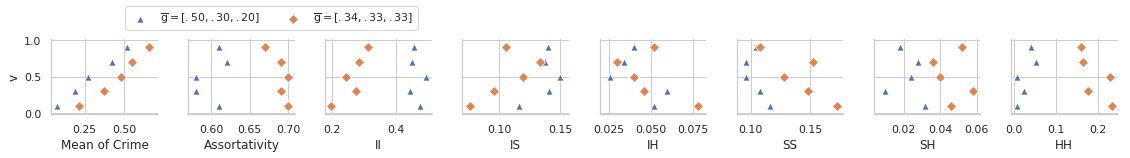

In [184]:
g=sns.PairGrid(dg,
               x_vars=["Mean of Crime","Assortativity","II","IS","IH","SS","SH","HH"],
               y_vars=['v'],
               hue="g",
               height=2,
               hue_kws={'marker':["^",'D']})
g.map(sns.scatterplot,s=50)
plt.legend(ncol=2,bbox_to_anchor=(-5.5, 1.5))

In [253]:
labels=list(dg.keys())[2:]

In [254]:
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False) # Set the angle
# close the plot

angles=np.concatenate((angles,[angles[0]]))  # Closed

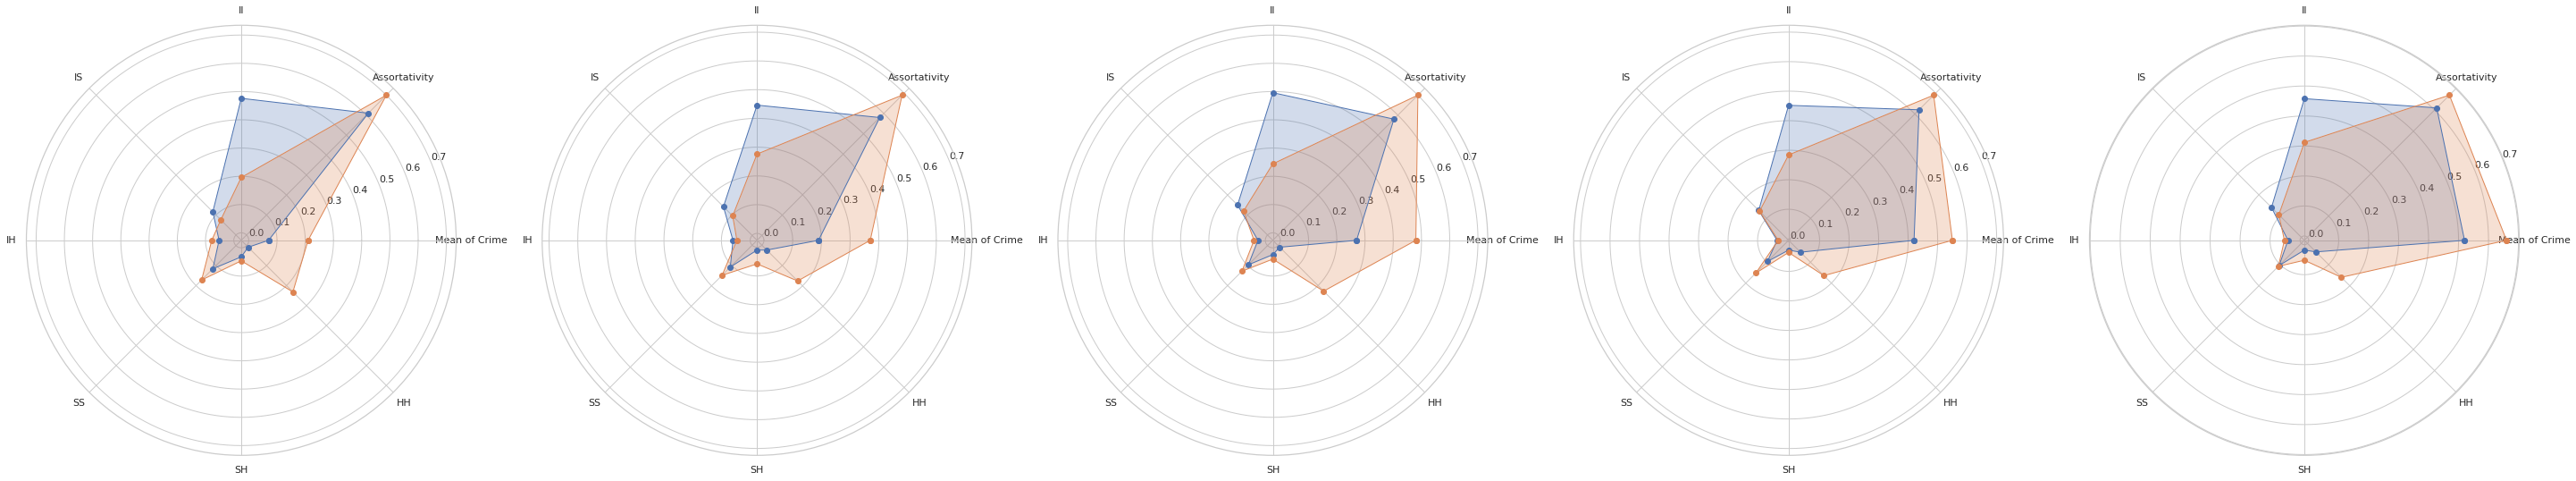

In [262]:
fig=plt.subplots(1,5,figsize=(50,20))
for i in range(5):
    stats=dg.values[i][2:]
    stats=np.concatenate((stats,[stats[0]]))  # Closed
    ax = plt.subplot(1,5,i+1, polar=True)   # Set polar axis
    ax.plot(angles, stats, 'o-', linewidth=1)  # Draw the plot (or the frame on the radar chart)
    ax.fill(angles, stats, alpha=0.25)  #Fulfill the area
    stats=dg.values[i+5][2:]
    stats=np.concatenate((stats,[stats[0]]))
    ax.fill(angles, stats, alpha=0.25)  #Fulfill the area
    ax.plot(angles, stats, 'o-', linewidth=1)  # Draw the plot (or the frame on the radar chart)
    ax.set_thetagrids(angles * 180/np.pi, labels)  # Set the label for each axis
    #ax.set_rlim(0,250)
    ax.grid(True)
